In [48]:
import warnings
warnings.filterwarnings('ignore')

In [230]:
#let us start by importing the relevant libraries
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score

In [50]:
os.chdir(r"E:\AI-ML\Unsupervised Learning")

In [51]:
df = pd.read_excel("Credit Card Customer Data.xlsx")

In [52]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [53]:
df.shape

(660, 7)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
Sl_No                  660 non-null int64
Customer Key           660 non-null int64
Avg_Credit_Limit       660 non-null int64
Total_Credit_Cards     660 non-null int64
Total_visits_bank      660 non-null int64
Total_visits_online    660 non-null int64
Total_calls_made       660 non-null int64
dtypes: int64(7)
memory usage: 36.2 KB


#### We have all non-null values in all columns. But columns "Sl_No" & "Customer Key" are not required for univariate analysis and cluster establishment. Customer key is just a unique value to represent a customer and is not important for this analysis. So we can drop these 2 columns for now

In [55]:
df_new = df.drop(['Sl_No','Customer Key'],axis=1)

In [56]:
df_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


In [57]:
df_new.shape

(660, 5)

## 1. Univariate Analysis

#### Let's analyze each variable one by one to understand insights of data

In [58]:
for i in list(df_new.columns): # unique values of all attributes
    print('Number of unique values in', i, 'is',df_new[i].nunique())

Number of unique values in Avg_Credit_Limit is 110
Number of unique values in Total_Credit_Cards is 10
Number of unique values in Total_visits_bank is 6
Number of unique values in Total_visits_online is 16
Number of unique values in Total_calls_made is 11


In [59]:
df_new.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


#### By looking into 5 points summary, it looks like Avg_Credit_Limit is highly positively skewed. Other attributes doesn't look like to be skewed

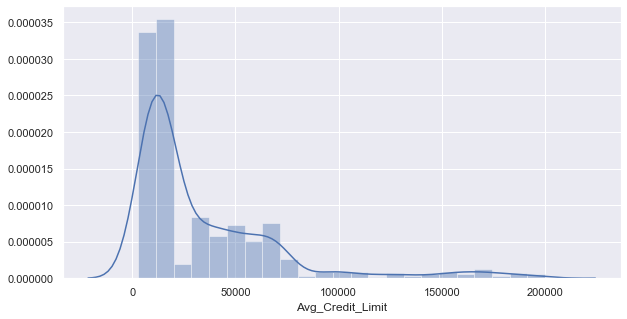

In [60]:
sns.set(color_codes = True)
plt.figure(figsize=(10,5));
sns.distplot(df_new['Avg_Credit_Limit']); # distribution plot

#### We can see that 'Avg_Credit_limit' is highly positively skewed. We will deal with outliers shortly. Apart from outliers, there are 2 major peaks in it's distribution and would might lead to 2 or probably 3 clusters within itself.

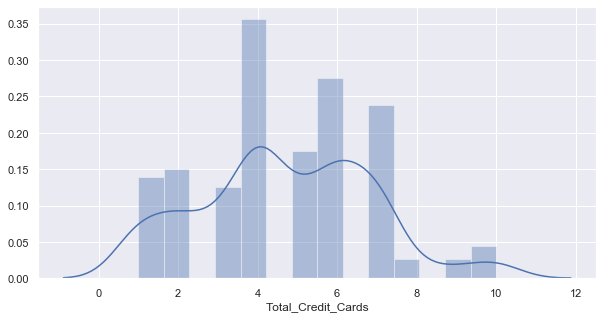

In [61]:
plt.figure(figsize=(10,5));
sns.distplot(df_new['Total_Credit_Cards']); # distribution plot

#### Attribute 'Total_Credit_Cards' is not skewed either positively or negatively but it's multinomial. We can see that it has 4 different levels of peaks and would might lead to 3 or 4 clusters.

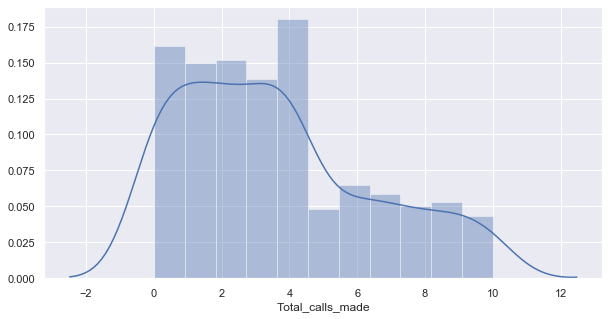

In [62]:
plt.figure(figsize=(10,5));
sns.distplot(df_new['Total_calls_made']); # distribution plot

#### 'Total_calls_made' is also not skewed, minimum number of calls made is ZERO and maximum number of calls made by any customer is 10. It seems like 2 clusters can demonstrate this attribute as we can see 2 different peaks. Let's see how this apparent observation would turn out as we move to cluster analysis later in this notebook

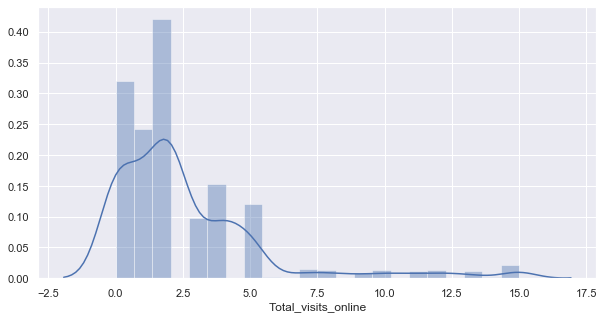

In [63]:
plt.figure(figsize=(10,5));
sns.distplot(df_new['Total_visits_online']); # distribution plot

#### We can see that 'Total_visits_online' is positively skewed but values are not differing much. I mean to say, maximum number of online visits are 15 by any customer. From the distribution of this attribute, we can estimate 2 clusters within this attribute.

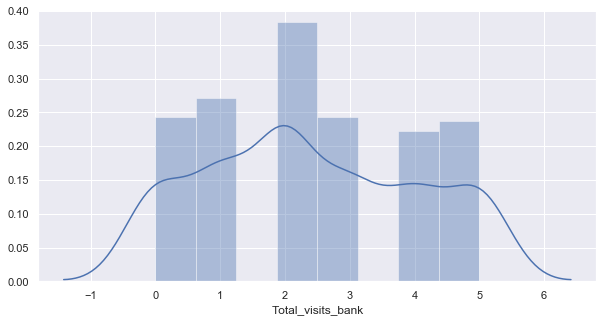

In [64]:
plt.figure(figsize=(10,5));
sns.distplot(df_new['Total_visits_bank']); # distribution plot

#### Maximum number of bank visits by any customer is 5, we can estimate 2 clusters within this attribute.

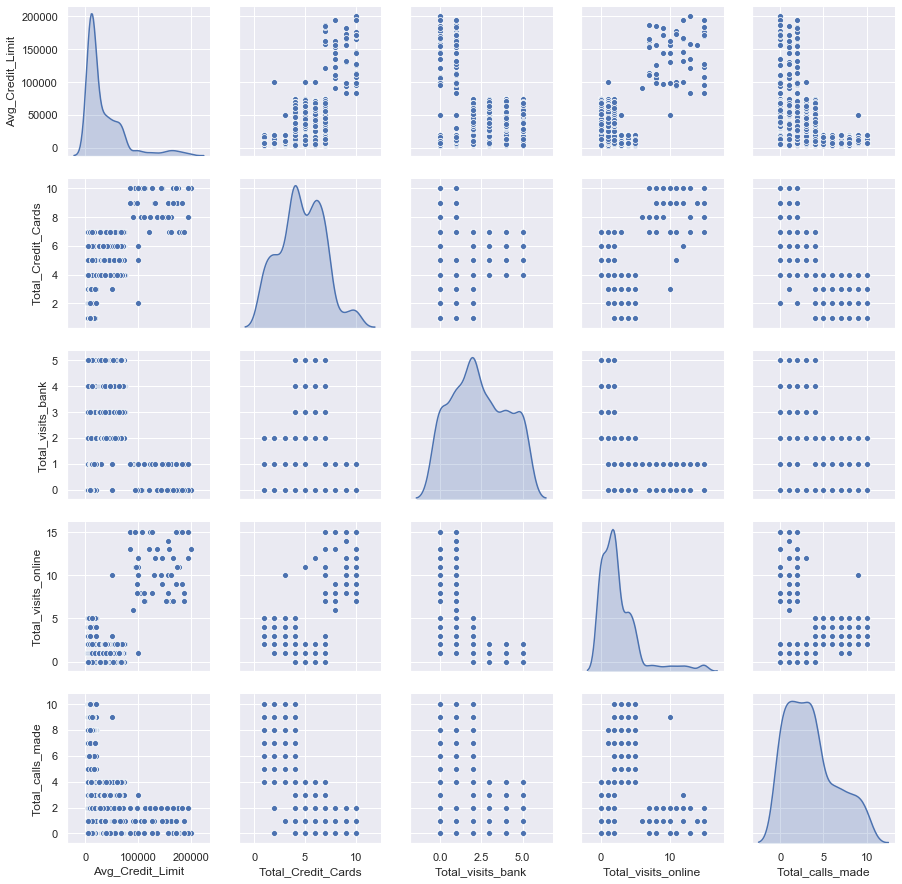

In [65]:
sns.pairplot(df_new, diag_kind='kde'); # pairplot

#### We can't see much correlation b/w attributes, which can further be checked with correlation function

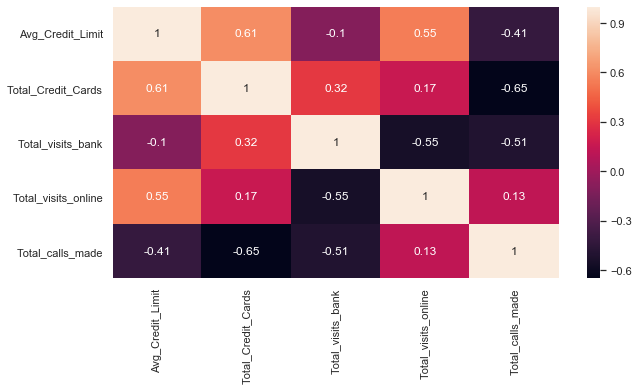

In [66]:
plt.figure(figsize=(10,5));
sns.heatmap(df_new.corr(), annot=True); # heatmap to get correlation coefficients, values vary from -1 to +1

#### We can see that maximum positive correlation is b/w 'Total_Credit_Cards' & 'Avg_Credit_Limit' which is 0.61 showing not much strong relation. 

#### Maximum negative correlation is b/w 'Total_calls_made' and 'Total_Credit_cards' (-0.65) showing if you have more credit cards, you will not make much calls to bank. 

#### Neither much positive nor much negative correlation is found b/w any attributes.

### Dealing with outliers

In [ ]:
plt.figure(figsize=(20,15))
pos = 1
for i in df_new.columns:  
    plt.subplot(3, 3, pos)  # ploting boxplots of all attributes
    sns.boxplot(df_new[i])
    pos += 1 

#### We have not much outliers in our data set, however attribute "Avg_Credit_Limit" has considerable number of outliers & "Total_visits_online" also has few outliers. Let's deal with them by replacing them with maximum whisker and then analyze

In [68]:
for i in df_new.columns:
    q1, q2, q3 = df_new[i].quantile([0.25,0.5,0.75]) # calculating q1,q2 & q3
    IQR = q3 - q1 # Inter Quartile Region 
    max_whisker = q3 + 1.5*IQR # Higher whisker
    a = df_new[i] > max_whisker
    df_new[i] = np.where(a, max_whisker, df_new[i]) # replacing outlier with higher whisker

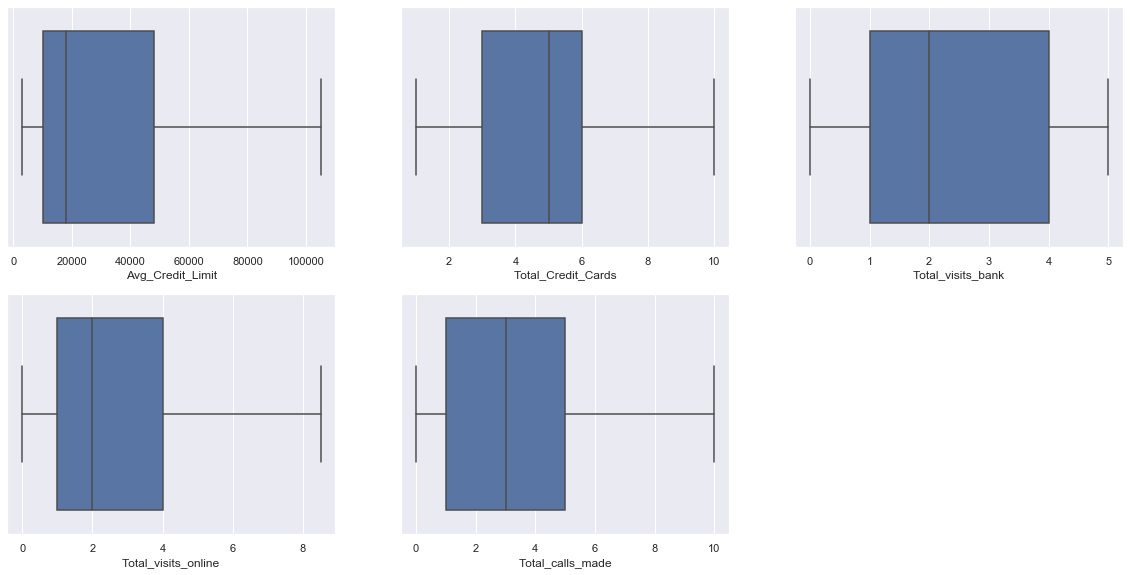

In [69]:
plt.figure(figsize=(20,15))
pos = 1
for i in df_new.columns:
    plt.subplot(3, 3, pos) # ploting all attributes box plot again to check if outliers are gone
    sns.boxplot(df_new[i])
    pos += 1 

#### We have dealt with outliers to replace them with maximum whiskers. Now we can move on with Z-score scaling and then k-means clustering

### Z-score Scaling

#### Before moving on to k-means clustering, let's apply Z-score scaling to avoid biased contribution of attributes specially attribute like "Avg_Credit_Limit".

In [70]:
# zscore scaling
df_scaled = df_new.apply(zscore)

In [71]:
df_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.398942,-1.249225,-0.860451,-0.619767,-1.251537
1,0.643619,-0.787585,-1.473731,2.705813,1.891859
2,0.643619,1.058973,-0.860451,0.267054,0.145528
3,-0.058511,0.135694,-0.860451,-0.619767,0.145528
4,2.398942,0.597334,-1.473731,2.705813,-0.203739


#### Let's analyze "Pairplot" once more to see how distribution curves of our attributes have been transformed

<Figure size 720x360 with 0 Axes>

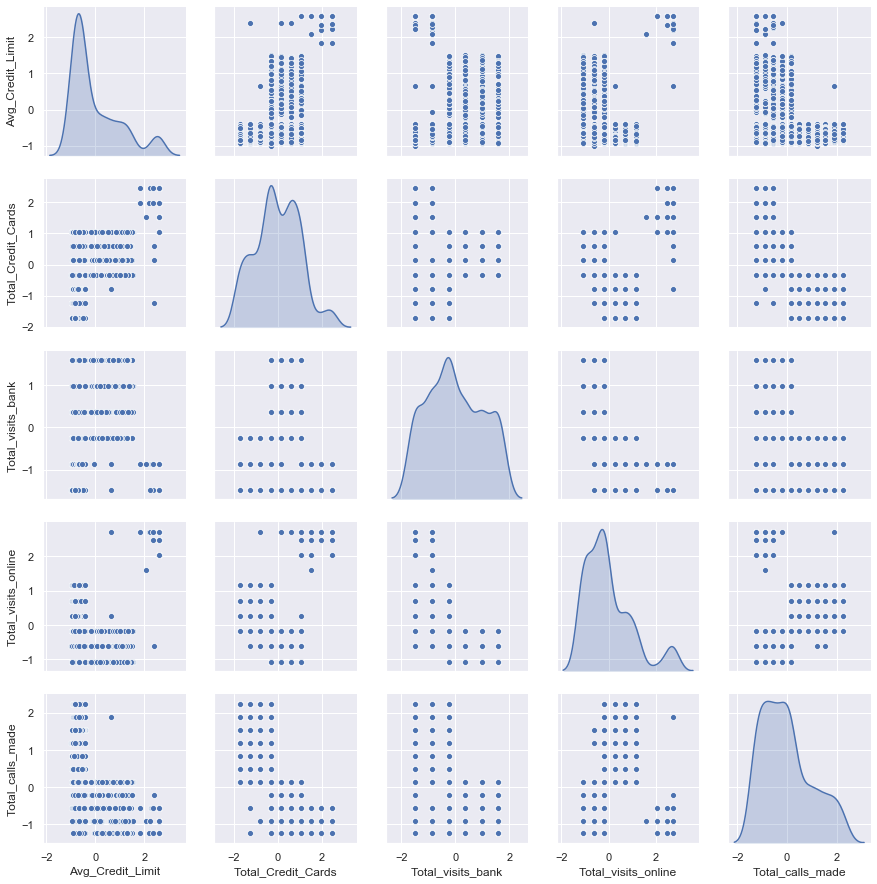

In [74]:
plt.figure(figsize=(10,5));
sns.pairplot(df_scaled, diag_kind= 'kde');

#### From the diagonal distribution graphs, we can say that 2 or 3 clusters would be required to segment this data set. 

#### Let's analyze correlation coefficient once again after replacement of outliers.

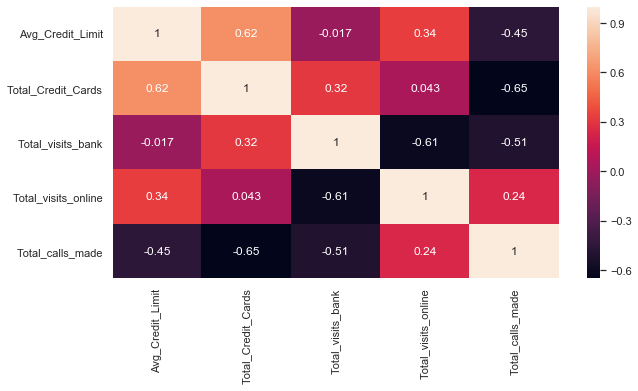

In [73]:
plt.figure(figsize=(10,5));
sns.heatmap(df_scaled.corr(), annot=True); # heatmap to check correlation coefficients

#### Our correlation co-efficients have changed slightly after removal of outliers from 2 attributes. Now, we can see that negative correlation b/w "Total_visits_online" & "Total_visits_bank" is changed from -0.55 to -0.61.

#### Also, positive correlation b/w "Total_visits_online" & "Avg_Credit_Limit" is decreased from 0.55 to 0.34.

#### Overall, it's good to replace our outliers with optimal values for any data analysis scope

## 2.

#### Code has been well commented so far and would continue commenting each code across the notebook. Graphs have been explained so far to draw conclusions and take some actions. 

#### Let's move on to cluster analysis

## 3. K-means Clustering

,num_of_clusters,cluster_errors
0,1,3300.000000
1,2,1949.904685
2,3,998.466106
3,4,813.856295
4,5,715.776222
5,6,640.460040
6,7,588.728288
7,8,560.995930
8,9,536.094176


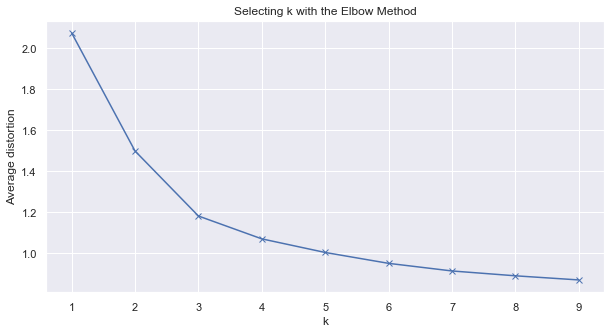

In [392]:
#Finding optimal no. of clusters

clusters=range(1,10)   # defining a range to check # of clusters
meanDistortions= []
cluster_errors = []

for k in clusters:
    model=KMeans(n_clusters=k, n_init=5)  # running a model with K-means algorithm having n_init=5
    model.fit(df_scaled)        # fiting a model
    prediction=model.predict(df_scaled) # predicting from model
    labels = model.labels_      # Labels of each point
    centroids = model.cluster_centers_  # finding coordinates of cluster centers
    cluster_errors.append(model.inertia_) # Sum of squared distances of samples to their closest cluster center
    meanDistortions.append(sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0])

plt.figure(figsize=(10,5));
plt.plot(clusters, meanDistortions, 'bx-');
plt.xlabel('k');
plt.ylabel('Average distortion');
plt.title('Selecting k with the Elbow Method');
clusters_df = pd.DataFrame({"num_of_clusters": clusters, "cluster_errors": cluster_errors})
clusters_df

#### We can see a bend in curve at k=3, after k=3 there is not much variation in curve. However, we can analyze it for k=3 and k=4

In [393]:
# Let's first create 3 clusters
kmeans_3 = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans_3.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [394]:
centroids = kmeans_3.cluster_centers_
centroids

array([[ 2.49232493,  1.86222621, -1.10576269,  2.5639219 , -0.87432983],
       [-0.68431485, -1.05962278, -0.9015185 ,  0.50954446,  1.14810882],
       [ 0.07427533,  0.37368962,  0.6663945 , -0.62780843, -0.55300488]])

In [395]:
#Clculating the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.492325,1.862226,-1.105763,2.563922,-0.874330
1,-0.684315,-1.059623,-0.901518,0.509544,1.148109
2,0.074275,0.373690,0.666395,-0.627808,-0.553005


#### We can see cluster 1 has lowest values for "Credit Limit", "Credit Cards" & "Visits Bank"; however cluster 2 has lowest value for "Online Visits" & cluster 0 has lowest value for "Total calls made"

#### Let's check number of data in each cluster

In [396]:
# clusters labels
labels = kmeans_3.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 50 224 386]


In [272]:
# cluster label predictions
predictions = kmeans_3.predict(df_scaled)
predictions
df_new["group"] = predictions
df_new['group'] = df_new['group'].astype('category')
df_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
group_hc                  int64
dtype: object

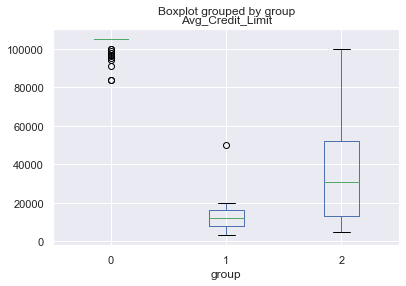

In [273]:
df_new.boxplot(column=['Avg_Credit_Limit'], by= 'group'); # boxplot analysis with grouping by group

#### We can see that group 0 has higher values of Credit limit
#### Group 1 has lower values of credit limit
#### Group 2 has mid level values of credit limit

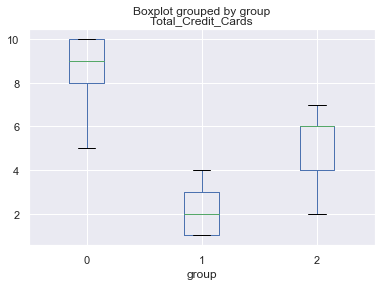

In [274]:
df_new.boxplot(column=['Total_Credit_Cards'], by= 'group');

#### Group 0 has higher values of credit cards which makes a bit relation with credit limit as well. We observed it before customer having more credit limit have chances of more credit cards.
#### Group 1 has lower values of credit cards depicting lower credit limits
#### Group 2 has credit card values mostly in b/w 2 to 7

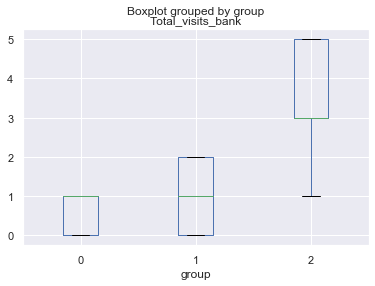

In [275]:
df_new.boxplot(column=['Total_visits_bank'], by= 'group');

#### Group 0 has higher values of credit limits, more credit cards and less bank visits
#### Group 1 has bank visits from 0 to 2
#### Group 2 has 1 to 5 bank visits which makes sense as customer having not much higher values of credit limits and not too many credit cards usually visit bank

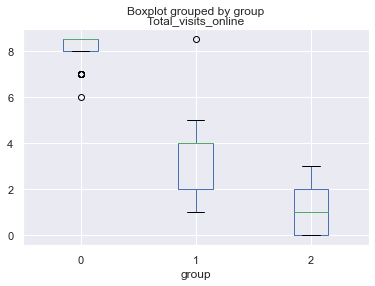

In [276]:
df_new.boxplot(column=['Total_visits_online'], by = 'group');

#### Group 0 has less number of bank visits, hence more number of online visits
#### Group 1 has mid level of online visits
#### Group 2 has more number of bank visits, so less number of online visits

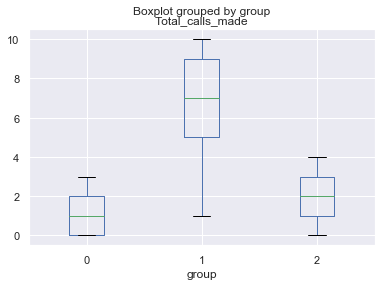

In [277]:
df_new.boxplot(column=['Total_calls_made'], by = 'group');

#### Customer who visit online with group 0 make less calls usually
#### Group 1 has less credit limit, less bank visits mid level online visits and highest values of calls made
#### Group 2 has many similar values with group 0 for calls made

### Making 4 clusters with K-means

In [278]:
# Let's now create 4 clusters
kmeans_4 = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans_4.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [279]:
centroids = kmeans_4.cluster_centers_
centroids

array([[ 0.85554168,  0.38058825,  0.47829506, -0.64680454, -0.5210598 ],
       [-0.6835003 , -1.06291281, -0.90445279,  0.51262025,  1.1526047 ],
       [-0.50450456,  0.36547881,  0.80063102, -0.61181375, -0.5733657 ],
       [ 2.49232493,  1.86222621, -1.10576269,  2.5639219 , -0.87432983]])

In [280]:
#Clculating the centroids for the columns to profile
centroid_df = pd.DataFrame(centroids, columns = list(df_scaled) )
centroid_df

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.855542,0.380588,0.478295,-0.646805,-0.521060
1,-0.683500,-1.062913,-0.904453,0.512620,1.152605
2,-0.504505,0.365479,0.800631,-0.611814,-0.573366
3,2.492325,1.862226,-1.105763,2.563922,-0.874330


#### Let's check number of data in each cluster

In [281]:
# Cluster Labels
labels = kmeans_4.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[164 223 223  50]


In [282]:
predictions = kmeans_4.predict(df_scaled)
predictions
df_new["group"] = predictions
df_new['group'] = df_new['group'].astype('category')
df_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
group_hc                  int64
dtype: object

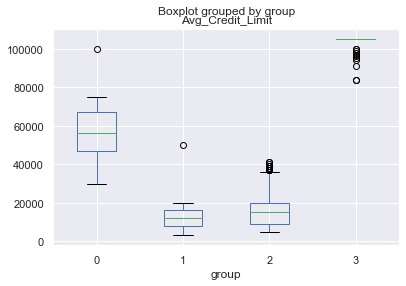

In [283]:
df_new.boxplot(column=['Avg_Credit_Limit'], by= 'group'); # Boxplot analysis

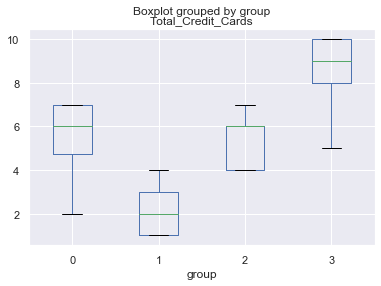

In [284]:
df_new.boxplot(column=['Total_Credit_Cards'], by= 'group');

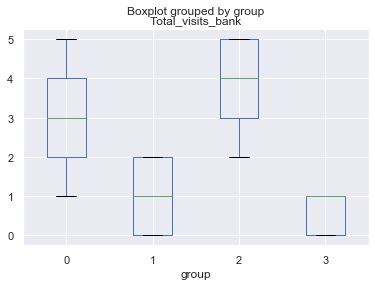

In [285]:
df_new.boxplot(column=['Total_visits_bank'], by= 'group');

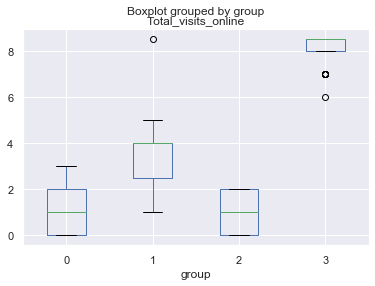

In [286]:
df_new.boxplot(column=['Total_visits_online'], by = 'group');

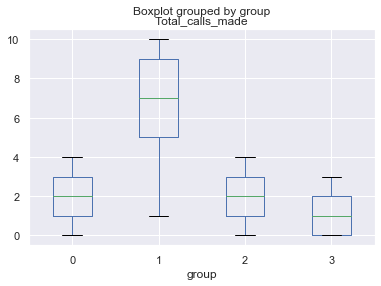

In [287]:
df_new.boxplot(column=['Total_calls_made'], by = 'group');

#### We can see Cluster 0 and cluster 3 has relatively higher values of credit limit & credit cards
#### Credit cards values are relatively higher for all clusters except cluster 1
#### Bank visits have higher values for cluster 0 and cluster 2 and minimum values for cluster 1 & 3
#### online visits have maximum value for cluster 3 mid level values for cluster 1 and minimum values for cluster 0 & cluster 2
#### Calls made have minimum values for clusters 0, 2 & 3 and higher values for cluster 1

## 4. Hierarchical Clustering

### We already have scaled data, let's staright away apply hierarchical clustering

#### Linkage 'Average' method

In [288]:
# let's first use 'average' linkage method
hc_average = linkage(df_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(hc_average , pdist(df_scaled))

c

0.8926672966587861

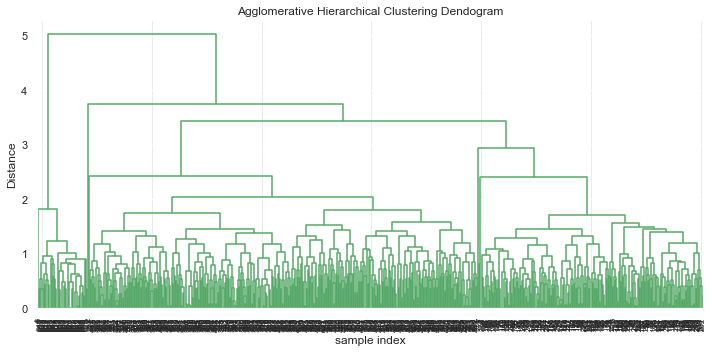

In [289]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram') # Ploting Agglomerative Hierarchical clustering
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(hc_average, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Linkage 'complete' Method

In [290]:
# linkage "complete" method
hc_complete = linkage(df_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(hc_complete , pdist(df_scaled))

c

0.8207884321476555

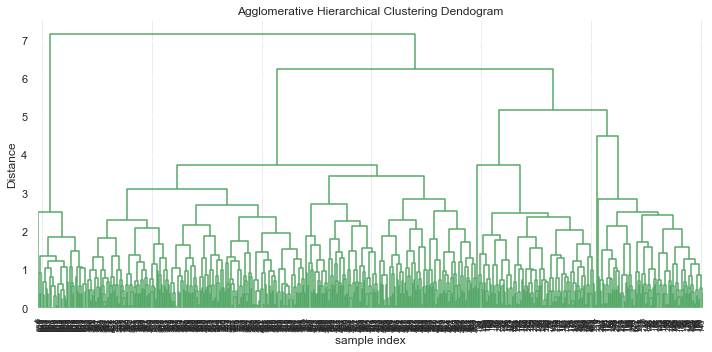

In [291]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(hc_complete, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Linkage 'ward' Method

In [292]:
# linkage "ward" method
hc_ward = linkage(df_scaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(hc_ward , pdist(df_scaled))

c

0.7702265240776373

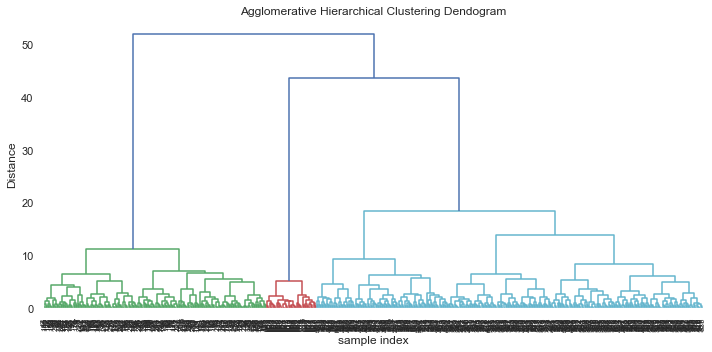

In [293]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(hc_ward, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### Linkage 'single' Method

In [294]:
# linkage "simple" method
hc_single = linkage(df_scaled, metric='euclidean', method='single')
c, coph_dists = cophenet(hc_single , pdist(df_scaled))

c

0.6666982080229052

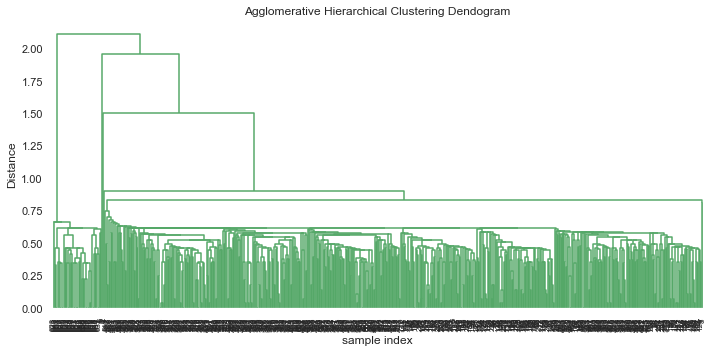

In [295]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(hc_single, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

#### As cophenatic coefficient is best for linkage method 'average', let's choose this method and make 3 clusters using "Agglomerative Clustering technique"

In [373]:
# Running Agglomerative Clustering
hc_clusters = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
hc_clusters.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [374]:
hc_clusters.labels_ # Cluster labels

array([2, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [375]:
labels_hc_average = hc_clusters.labels_
counts = np.bincount(labels_hc_average[labels_hc_average>=0])
print(counts)

[609  50   1]


#### We have only 1 data point with 3rd cluster which is not realistic and kills the purose of clustering, let's try with 4 clusters and see how it behaves

In [376]:
hc_clusters = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
hc_clusters.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [377]:
labels_hc_average = hc_clusters.labels_
counts = np.bincount(labels_hc_average[labels_hc_average>=0])
print(counts)

[223 386   1  50]


#### Even with clusters = 4 there is 3rd cluster with only one data point. It means, we might need to go for 2 clusters

In [378]:
hc_clusters = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='average')
hc_clusters.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=2,
                        pooling_func='deprecated')

In [379]:
labels_hc_average = hc_clusters.labels_
counts = np.bincount(labels_hc_average[labels_hc_average>=0])
print(counts)

[610  50]


#### Although linkage 'average' method is giving us best cophenatic coefficient but it's not making good cluster.
#### Reason being, we observed from K-means that this data is making sensible cluster till at least 4 clusters and linkage method of 'average' is showing only 1 data point when 3 clusters are selected to build.
#### So, let's try other linkage methods like 'ward' or 'complete' as their cophenatic coefficients are also satisfactory

In [341]:
hc_clusters_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
hc_clusters_complete.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [354]:
labels_hc_complete = hc_clusters_complete.labels_
counts = np.bincount(labels_hc_complete[labels_hc_complete>=0])
print(counts)

[224  50 386]


In [355]:
labels_hc_complete # Cluster labels

array([0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [352]:
hc_clusters_ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
hc_clusters_ward.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3,
                        pooling_func='deprecated')

In [356]:
labels_hc_ward = hc_clusters_ward.labels_
counts = np.bincount(labels_hc_ward[labels_hc_ward>=0])
print(counts)

[387 223  50]


In [371]:
labels_hc

array([0, 1, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [387]:
hc_clusters_ward_4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hc_clusters_ward_4.fit(df_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4,
                        pooling_func='deprecated')

In [388]:
labels_hc_ward_4 = hc_clusters_ward_4.labels_
counts = np.bincount(labels_hc_ward_4[labels_hc_ward_4>=0])
print(counts)

[255 223  50 132]


In [357]:
df_new['group_hc'] = labels_hc_complete

In [389]:
df_new_hc = df_new.drop('group',axis=1)

In [390]:
df_new_hc['group_hc'].value_counts()

2    386
0    224
1     50
Name: group_hc, dtype: int64

In [359]:
df_new_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_hc
0,100000.0,2.0,1.0,1.0,0.0,0
1,50000.0,3.0,0.0,8.5,9.0,0
2,50000.0,7.0,1.0,3.0,4.0,2
3,30000.0,5.0,1.0,1.0,4.0,2
4,100000.0,6.0,0.0,8.5,3.0,1


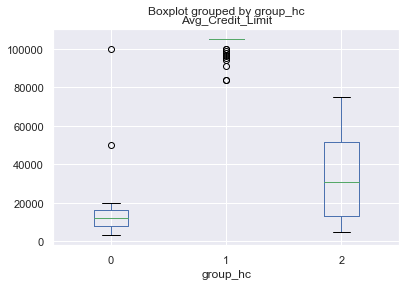

In [360]:
df_new_hc.boxplot(column=['Avg_Credit_Limit'], by= 'group_hc');

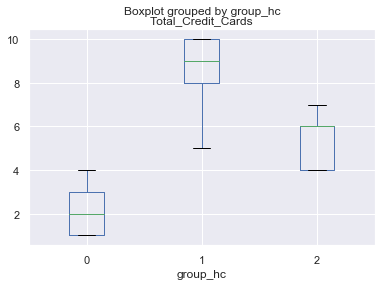

In [361]:
df_new_hc.boxplot(column=['Total_Credit_Cards'], by= 'group_hc');

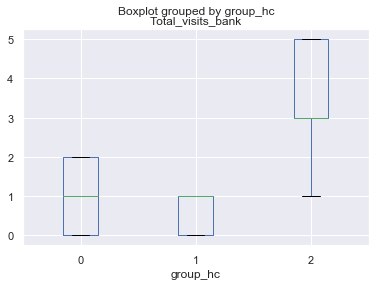

In [362]:
df_new_hc.boxplot(column=['Total_visits_bank'], by= 'group_hc');

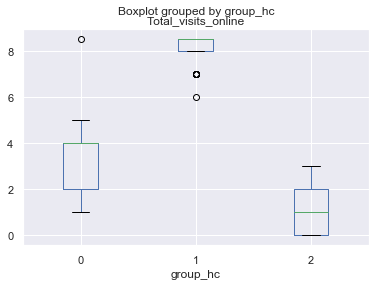

In [363]:
df_new_hc.boxplot(column=['Total_visits_online'], by= 'group_hc');

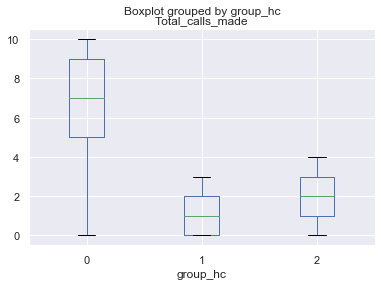

In [364]:
df_new_hc.boxplot(column=['Total_calls_made'], by= 'group_hc');

#### group_hc 0 has lower credit limits with very few outliers, group_hc 1 has higher credit limits and group_hc 2 has mid level credit limits
#### group_hc 0 has  less values of creedit cards ,group_hc 1 has higher values of credit cards and group_hc 2 has mid-level values of credit cards not more than 7
#### group_hc 0 & 1 have relatively less bank visits, while group_hc 2 has more bank visits
#### group_hc 0 has mid-level online visits, group_hc 1 has more online visits as we have earlier observed customers with higher credit limits and higher number of credit cards have more online visits comparing to other customers. group_hc 2 has less values of online visits.
#### As we hace observed earlier in K-means too, customers having least credit limit values are the ones who call most to bank. Here in group_hc 0 has higher values of bank calls as it has least credit limits and lesser number of credit cards. group_hc 1 & 2 have relatively less bank calls.

## 5. Silhouette Score

###### Silhouette Score for K-means with 3 clusters

In [365]:
kcluster_3_label = kmeans_3.fit_predict(df_scaled)

In [366]:
silhouette_avg_kmeans_3 = silhouette_score(df_scaled,kcluster_3_label)

In [367]:
silhouette_avg_kmeans_3

0.5169867470092899

In [368]:
kcluster_4_label = kmeans_4.fit_predict(df_scaled)

In [369]:
silhouette_avg_kmeans_4= silhouette_score(df_scaled,kcluster_4_label)

In [370]:
silhouette_avg_kmeans_4

0.38147048130671246

### Silhouette average score for K-means with 3 clusters is approx. 0.52 and this score is 0.38 with K-means 4 clusters

###### Silhouette Score for heirarchical clustering

In [380]:
silhouette_avg_hc_average = silhouette_score(df_scaled,labels_hc_average)

In [381]:
silhouette_avg_hc_average

0.5172480049319457

In [382]:
silhouette_avg_hc_complete = silhouette_score(df_scaled,labels_hc_complete)

In [383]:
silhouette_avg_hc_complete

0.5161199988919521

In [384]:
silhouette_avg_hc_ward = silhouette_score(df_scaled,labels_hc_ward)

In [386]:
silhouette_avg_hc_ward

0.517065019487537

## 6. Comparison

#### 1. Silhouette score for hierarchichal clustering is almost same for linkage methods of average, complete & ward methods. Silhouette value for average method is slightly better but it was not making good clusters. 
#### 2. However, silhouette score for K-means with 3 clusters is better than silhouette score with 4 clusters.
#### 3. Silhouette score with K-means for 3 clusters is almost same as silhouette score with average, complete & ward methods.
#### 4. We observed that K-means clustering is Centroid based or partition-based, however hierarchichal clustering is Hierarchical & agglomerative.
#### 5. We used Elbow-method to find optimal number of clusters, however we used dendogram which sometimes feels slightly convenient to chose number of clusters.
#### 6. There is not much directional approach in K-means clustering, however we have top-bottom or bottom-up directional approach in hierarchichal clustering

## Now, let's compare 3 clusters formed with K-means and 3 clusters formed with hierarchichal clustering

#### Both K-means and hierarchichal clusters having 3 clusters have equal number of data points, group tag is different. 
#### But, in both K-means clusters and hierarchichal clusters customers having higher credit limits tend to have higher number of credit cards. Their bank visits are less and online visits are more while they make less calls to bank.
#### In both K-means & hierarchichal clustering, customers having less credit limits are calling much to bank.
#### Mid-level credit limit customers are the most who visit bank, both in K-means & hierarchichal clusters

## 7. Cluster Analysis with group class

In [391]:
df_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group,group_hc
0,100000.0,2.0,1.0,1.0,0.0,0,0
1,50000.0,3.0,0.0,8.5,9.0,1,0
2,50000.0,7.0,1.0,3.0,4.0,0,2
3,30000.0,5.0,1.0,1.0,4.0,0,2
4,100000.0,6.0,0.0,8.5,3.0,3,1


In [397]:
predictions = kmeans_3.predict(df_scaled)
predictions
df_new["group"] = predictions
df_new['group'] = df_new['group'].astype('category')
df_new.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
group                  category
group_hc                  int64
dtype: object

In [400]:
df_new.drop('group_hc',axis=1,inplace=True)

In [401]:
df_new.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,100000.0,2.0,1.0,1.0,0.0,2
1,50000.0,3.0,0.0,8.5,9.0,1
2,50000.0,7.0,1.0,3.0,4.0,2
3,30000.0,5.0,1.0,1.0,4.0,2
4,100000.0,6.0,0.0,8.5,3.0,0


In [399]:
df_new_hc.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group_hc
0,100000.0,2.0,1.0,1.0,0.0,0
1,50000.0,3.0,0.0,8.5,9.0,0
2,50000.0,7.0,1.0,3.0,4.0,2
3,30000.0,5.0,1.0,1.0,4.0,2
4,100000.0,6.0,0.0,8.5,3.0,1


#### Let's compare Pairplot with hue=group both for K-means & hierarchichal clusters with clusters = 3 

### K-means labeled Pair-Plot

<Figure size 720x360 with 0 Axes>

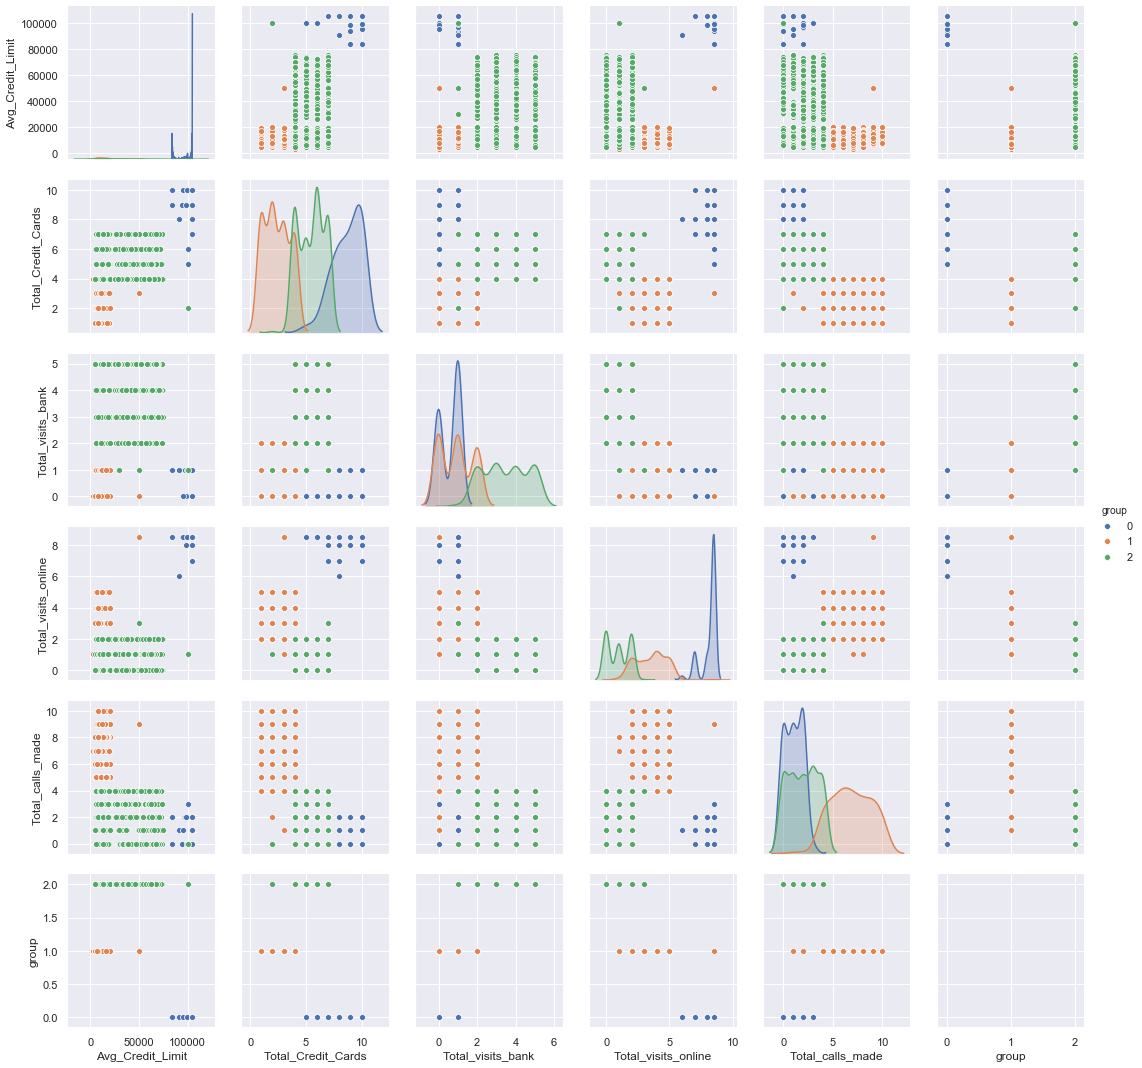

In [405]:
plt.figure(figsize=(10,5));
sns.pairplot(df_new, hue='group');

#### We can clearly visualize what we explained before that customers having higher credit limits are more likely to have higher number of credit cards and are more likely to have higher online visits with less number of bank calls.
#### Customers having mid-level credit limits are more likely to visit bank.
#### Customers having least credit limits have less online visits, less bank visits but more number of bank calls

In [409]:
df_new['group'].value_counts()

2    386
1    224
0     50
Name: group, dtype: int64

### Hierarchichal Clustering Labeled Pair Plot

<Figure size 720x360 with 0 Axes>

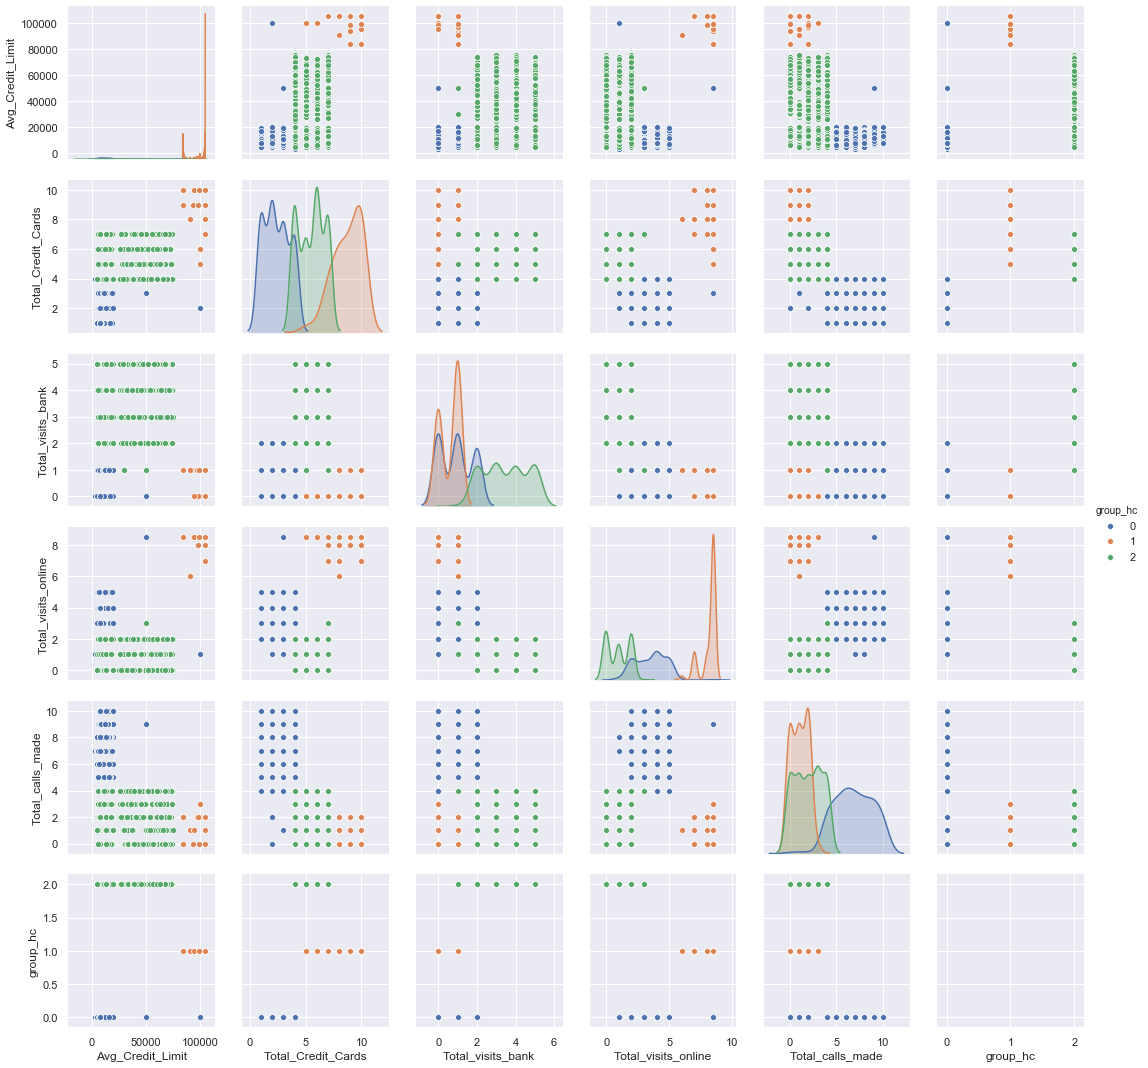

In [406]:
plt.figure(figsize=(10,5));
sns.pairplot(df_new_hc, hue='group_hc');

In [408]:
df_new_hc['group_hc'].value_counts()

2    386
0    224
1     50
Name: group_hc, dtype: int64

#### K-means clusters group 0 is same as hierarchical clustering group 1 with equal number of data points.

#### Both pair plots are showing same results and same analysis

## Key Questions:

## 1. How many different segments of customers are there?

##### There are 3 different segments of customers. If we go for 4 segments, 2 segments remain same however one segment further divides to form 2 segments and in total of 4.
##### But, our data set is quite explained by 3 segments both by K-means and hierarchichal clustering

## 2. How are these segments different from each other?

##### These segments are divided into higher, mid-level and lower category as far as average credit limits of customers are concerned.
##### We have 50 customers who are having higher credit limits, 224 customers with lower credit limits & 386 customers having mid-level credit limits
##### These 50 customers (higher category) have higher number of credit cards and they oftenly visit bank websites (online). These 50 customers make less calls to bank
##### Mid-level category visits bank more
##### Lower category customers have less online visits, less bank visits but more bank calls

## 3. What are your recommendations to the bank on how to better market to and service these customers?

##### Mid-level customers are potential customers and they are higher in numbers (almost 58.5%). Make them to visit bank website more, as they are potential customers they have a potential to get more credit cards as their credit limits is not much lower.
##### Lower category customers are neither visiting bank nor they are visiting much bank website rather they are calling to bank. 
##### Marketing/Business Teams should contact this lower category customers and:
    ##### solve their queries
    ##### make sure they have online banking active
    ##### market them the benefits of online account
    ##### if these customers are not being contacted and marketed appropriately, bank might lose these customers